* Project: LSMS_ag_prod 
* Created on: Feb 2025
* Created by: rg
* Edited on: 2 April 25
* Edited by: rg

* does
	* creates graph crop percentage by country.

* notes:
    * to load data and save figure, file path needs to be updated manually.

In [1]:
# we are going to try to create the tables and graph 
# import libraries

import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# specify the file path to the data
file_path = '/Users/rodrigoguerra/Library/CloudStorage/OneDrive-UniversityofArizona/weather_and_agriculture/lsms_base/countries/aggregate/allrounds_final_weather_cp.dta'

# read the file
df_all_rounds = pd.read_stata(file_path)

/var/folders/wj/dcwc9sc12tz299sg285qbzvr0000gn/T/ipykernel_2360/2688337963.py:5: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_all_rounds = pd.read_stata(file_path)


In [3]:
# drop if crop = missing 
df_all_rounds = df_all_rounds[df_all_rounds['crop'].notnull()]

# count plots 
df_all_rounds['count_plots'] = 1

# sum of count plots by country and crop 
df_all_rounds = df_all_rounds.groupby(['country', 'crop'], as_index = False)['count_plots'].sum()

/var/folders/wj/dcwc9sc12tz299sg285qbzvr0000gn/T/ipykernel_2360/1953609472.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all_rounds['count_plots'] = 1


In [4]:
# calculate total plots for each country 
df_all_rounds['total_plots'] = df_all_rounds.groupby('country')['count_plots'].transform('sum')

# calculate percentage by crop 
df_all_rounds['percent_crop'] = (df_all_rounds['count_plots']/ df_all_rounds['total_plots']) * 100 

# reshap the data for plotting the graph 
reshape_df = df_all_rounds.pivot(index = "country", columns = "crop", values = "percent_crop").fillna(0)


In [5]:
# set order crop categories
all_crops = ['Barley', 'Beans/Peas/Lentils/Peanuts', 'Maize', 'Millet', 
             'Rice', 'Nuts/Seeds', 'Sorghum', 'Wheat', 'Tubers/Roots', 'Other', 'Fruits', 'Cash Crops']

# reshape and reindex to include all crops
reshape_df = df_all_rounds.pivot(index = "country", columns = "crop", values = "percent_crop").fillna(0)
reshape_df = reshape_df.reindex(columns = all_crops, fill_value = 0)

# now assing colors based on crop 
crop_colors = {
    'Barley': "#00008B",  
    'Beans/Peas/Lentils/Peanuts': "#8B0000", 
    'Maize': "#006400",  
    'Millet': "#9B870C",  
    'Rice': "#FF8C00",  
    'Nuts/Seeds': "purple",
    'Sorghum': "#6A5ACD",
    'Wheat': "#008080", 
    'Tubers/Roots': "pink",
    'Other': "gray",
    'Fruits': "#A0522D", 
    'Cash Crops': "#2F4F4F"
}

# extract the colors in the same order as columns 
colors = [crop_colors[crop] for crop in reshape_df.columns]

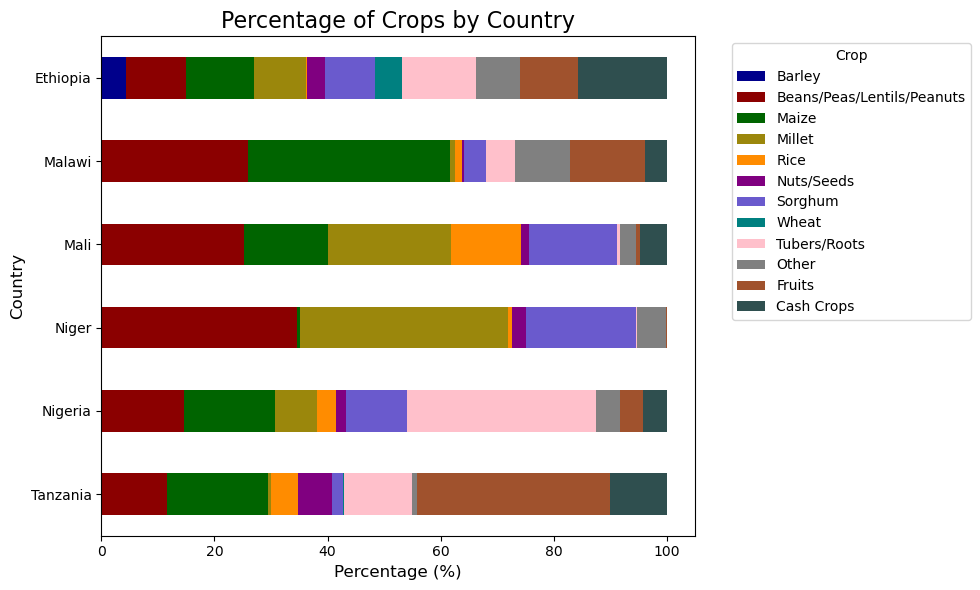

In [7]:
# sort countries alphabetically (top to bottom on the plot)
reshape_df = reshape_df.sort_index(ascending = False)

# plot the bar graph 
reshape_df.plot(
    kind = "barh",
    stacked = True,
    figsize = (10, 6),
    color = colors
)

plt.title("Percentage of Crops by Country", fontsize = 16)
plt.xlabel("Percentage (%)", fontsize = 12)
plt.ylabel("Country", fontsize = 12)
plt.legend(title = "Crop", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()

file_path_output = '/Users/rodrigoguerra/Library/CloudStorage/OneDrive-UniversityofArizona/ag_prod/graphs&tables/figures/percentage_of_crop_by_country_fig.pdf'  
plt.savefig(file_path_output, format = "pdf", dpi = 300)  

plt.show()
